## 1. Import

### 1.1 Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
import warnings
warnings.filterwarnings('ignore')

### 1.2 Load the dataset into the dataframe

In [2]:
df = pd.read_csv('C:/Users/Welcome/Downloads/Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## 2. Cleaning the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Complain'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  int64  
 12  Card Type           10000 non-null  object 
 13  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 3. EDA 

### 3.1 EDA variables with 'Exited' variable

In [7]:
churn_rate = sum(df['Exited']) / len(df)
retention_rate = (1-churn_rate)
print(f'Churn Rate: {churn_rate:.2%}')
print(f'Retention Rate: {retention_rate:.2%}')

Churn Rate: 20.38%
Retention Rate: 79.62%


                                             |          | [  0%]   00:00 -> (? left)


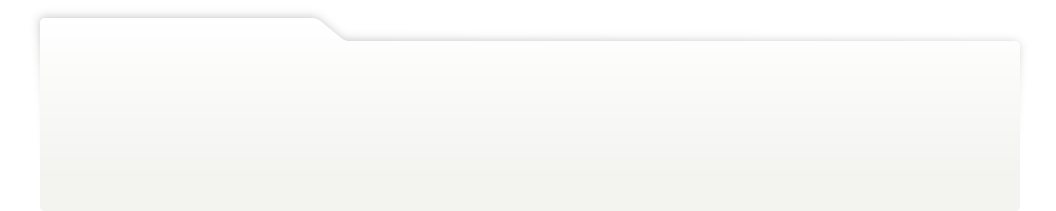
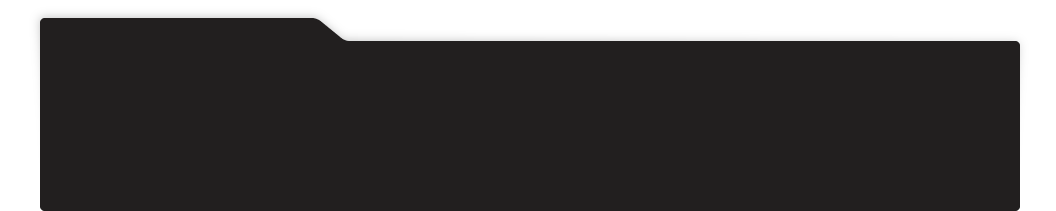
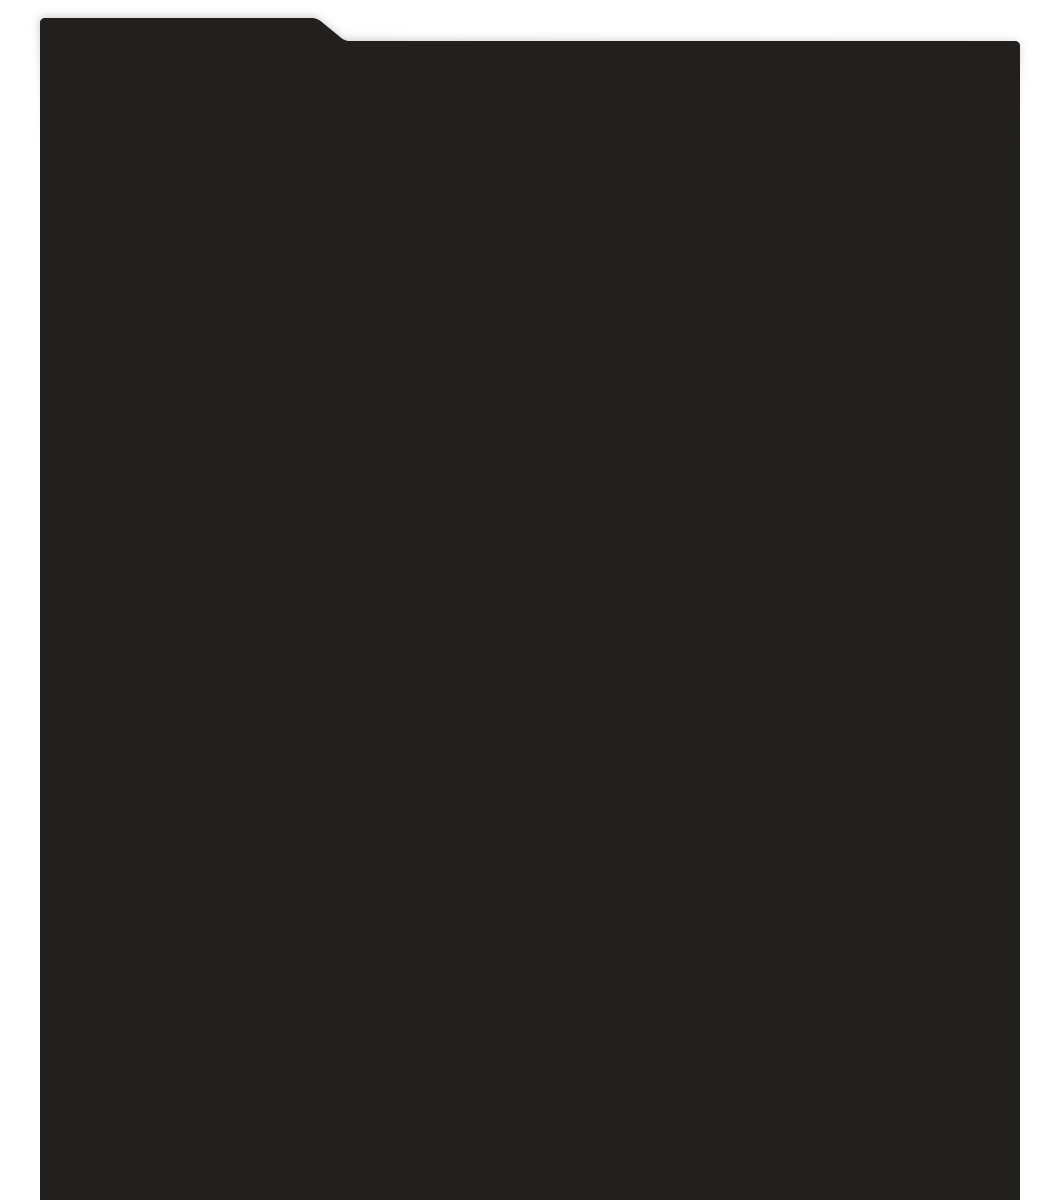
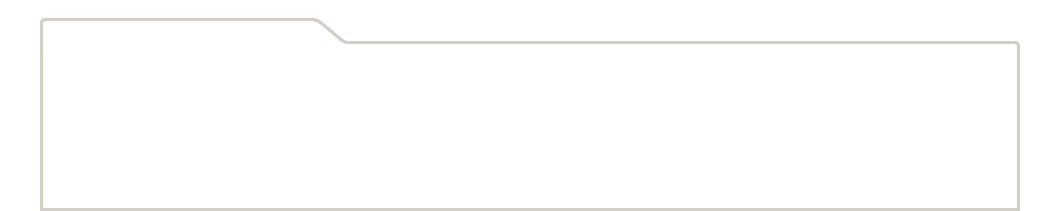
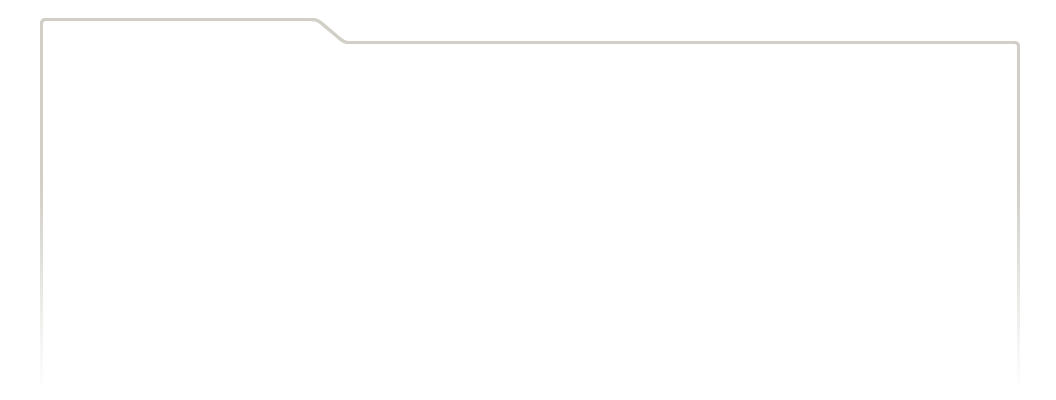
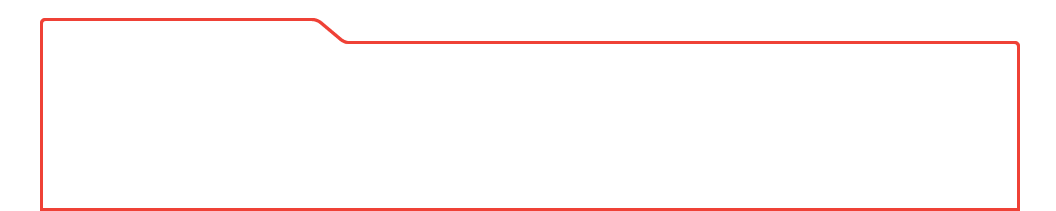
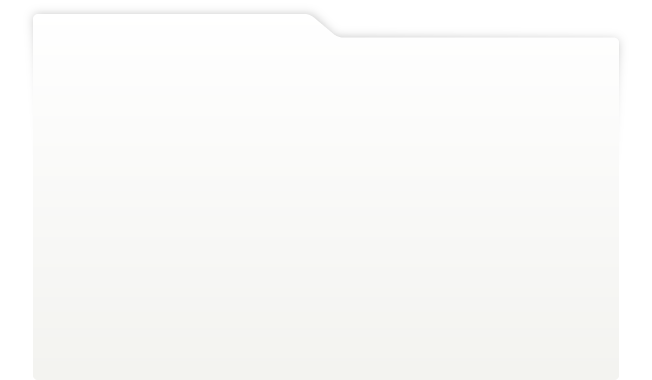
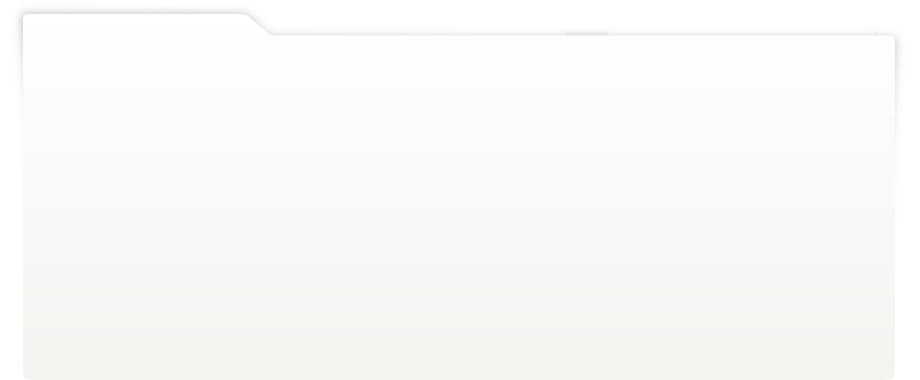
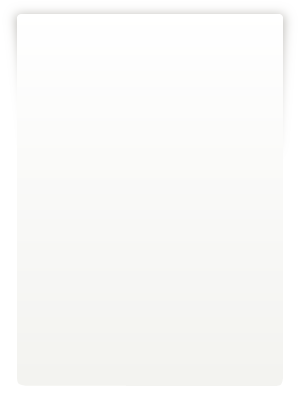
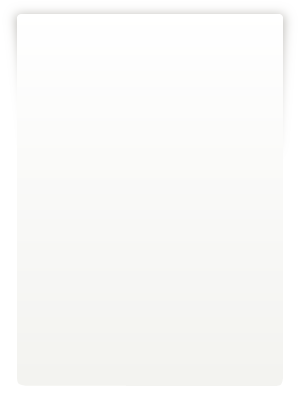
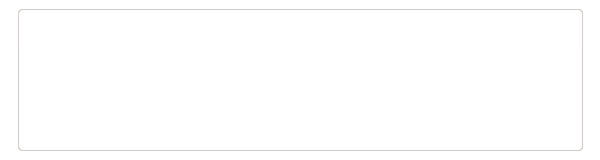
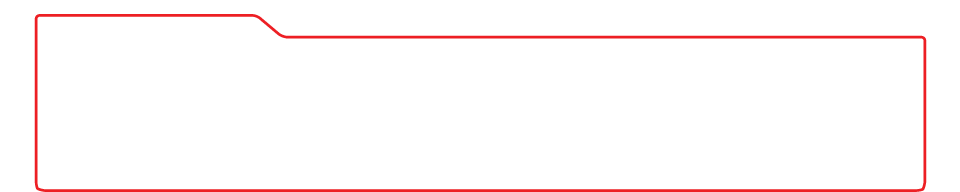
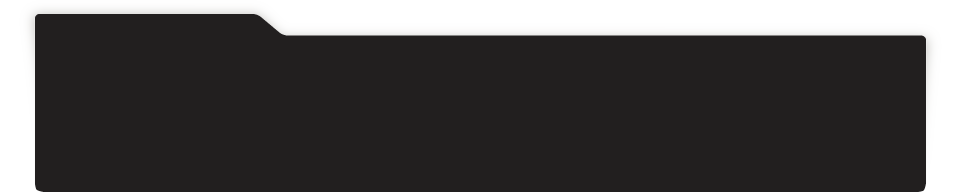
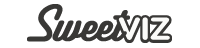
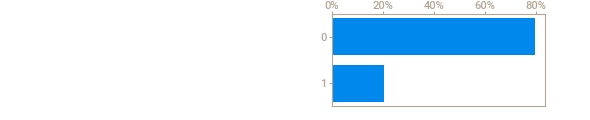
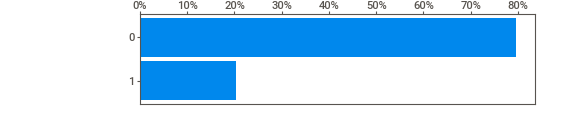
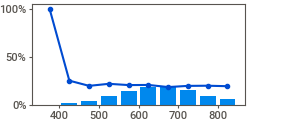
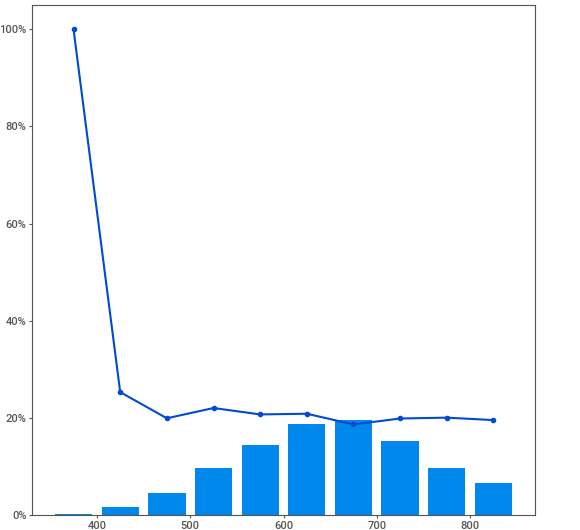
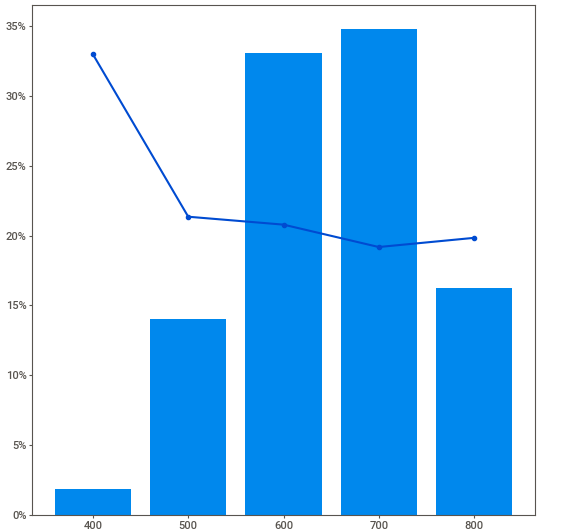
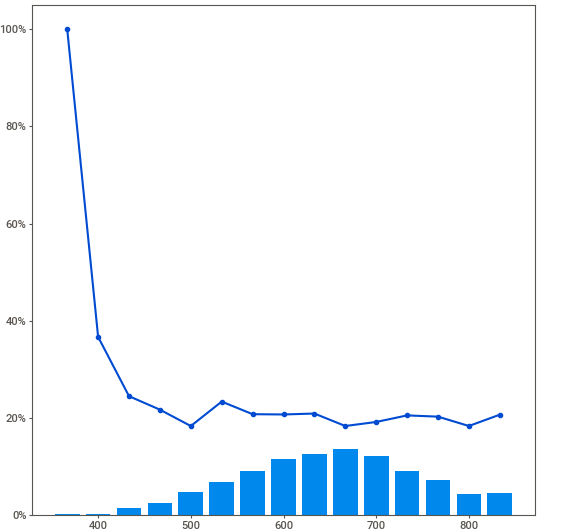
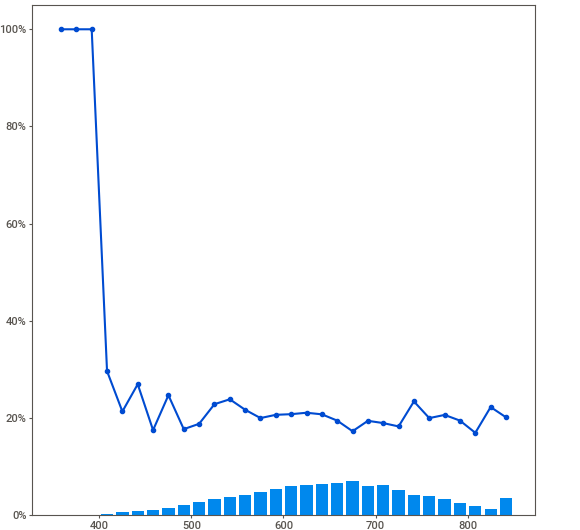
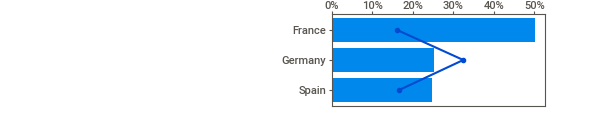
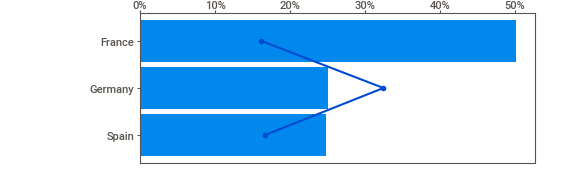
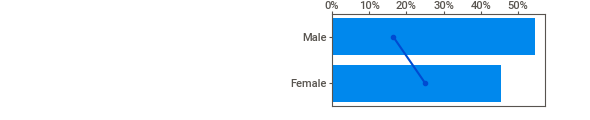
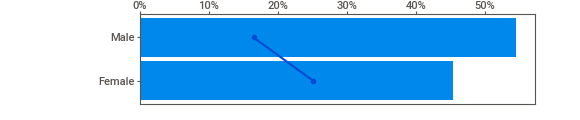
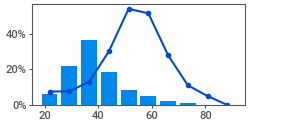
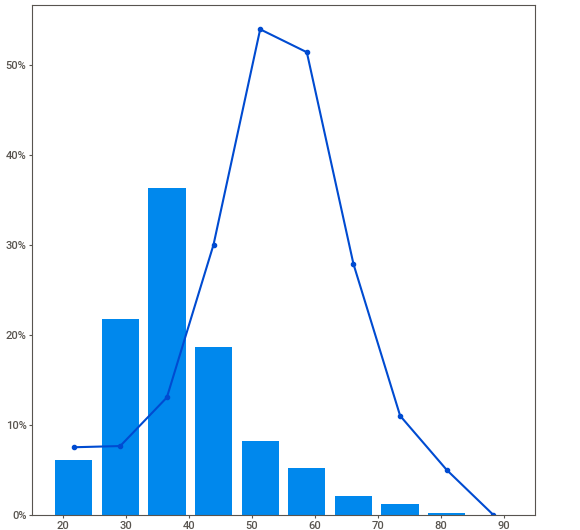
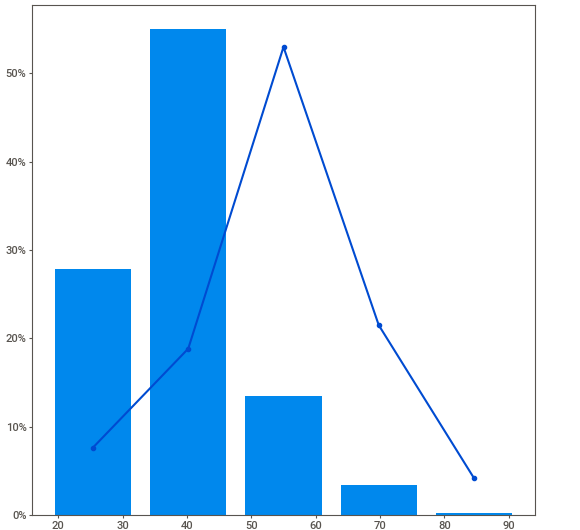
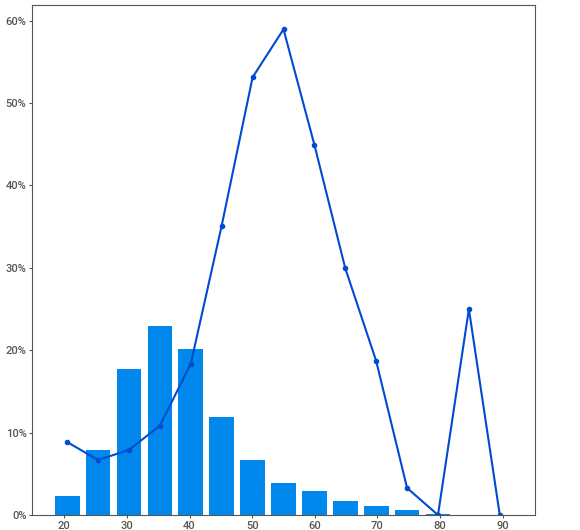
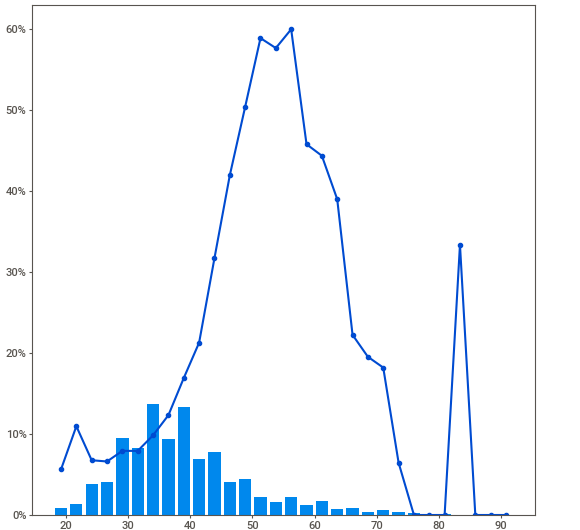
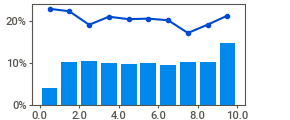
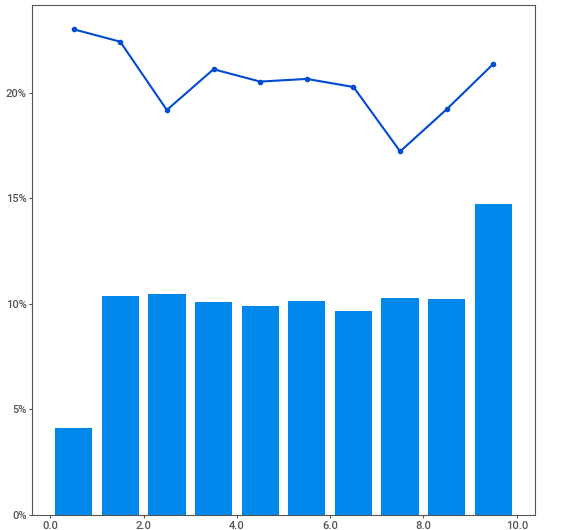
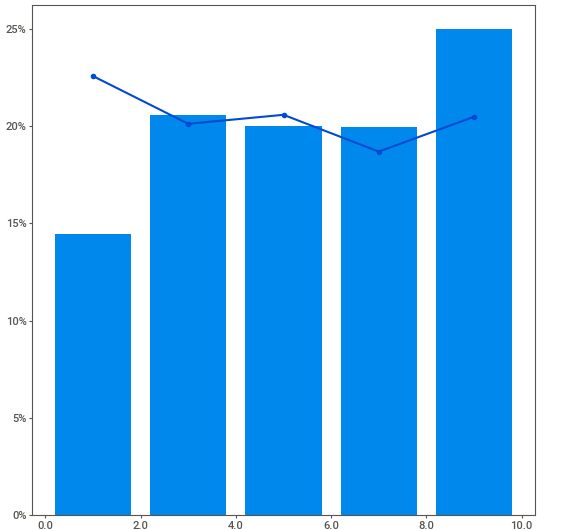
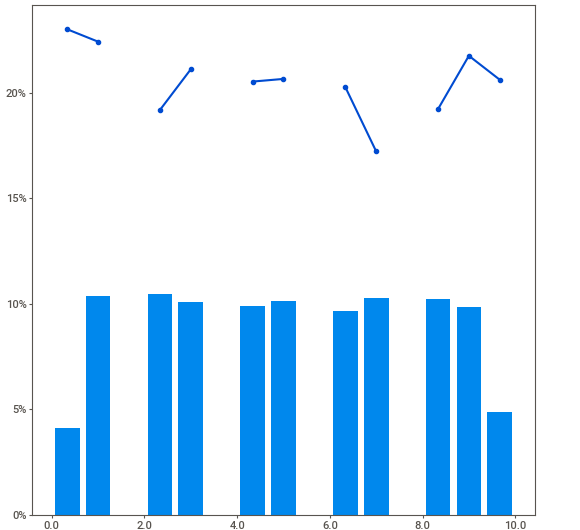
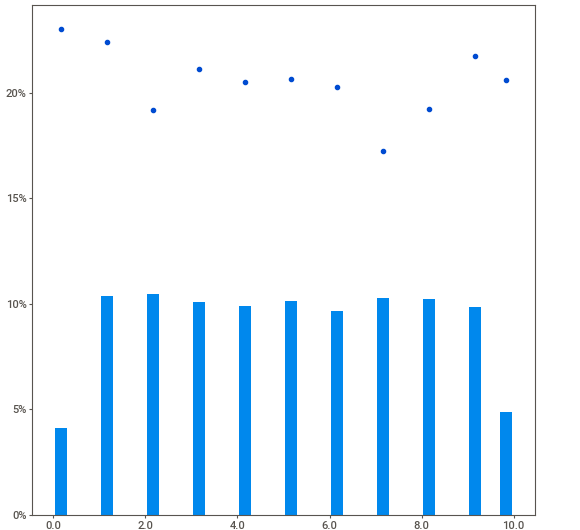
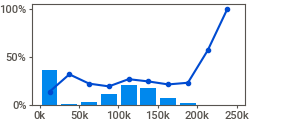
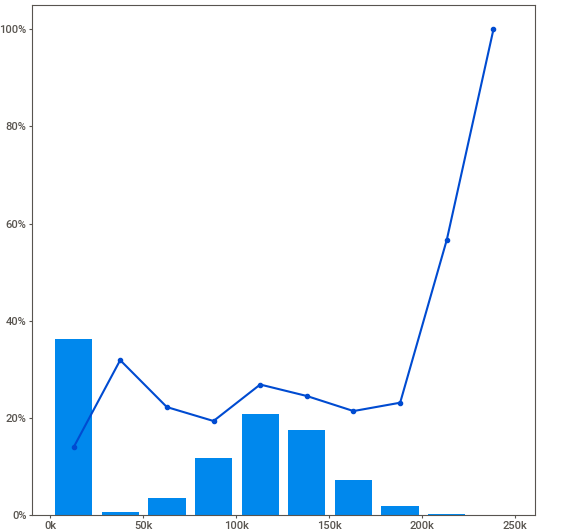
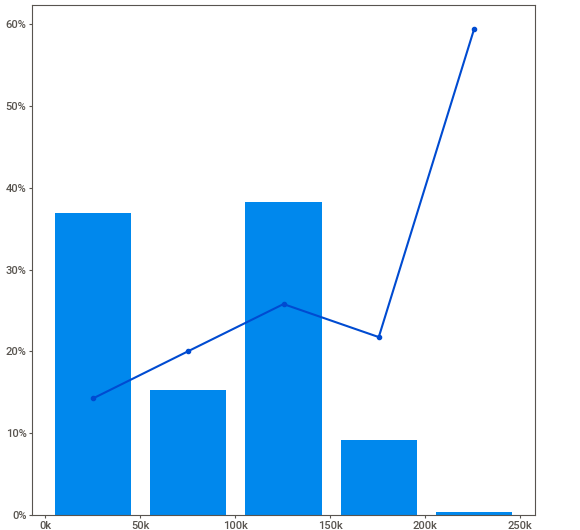
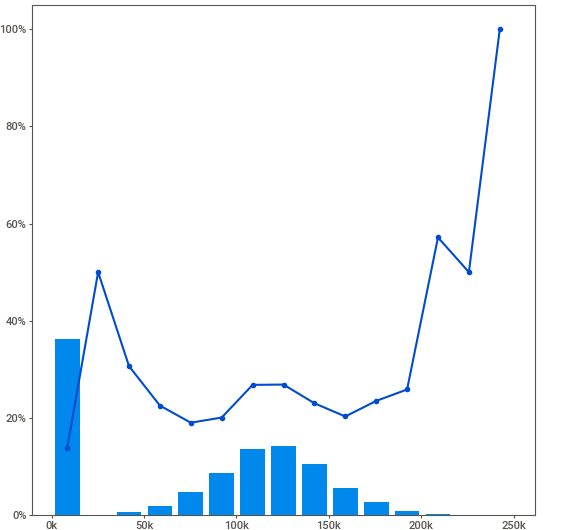
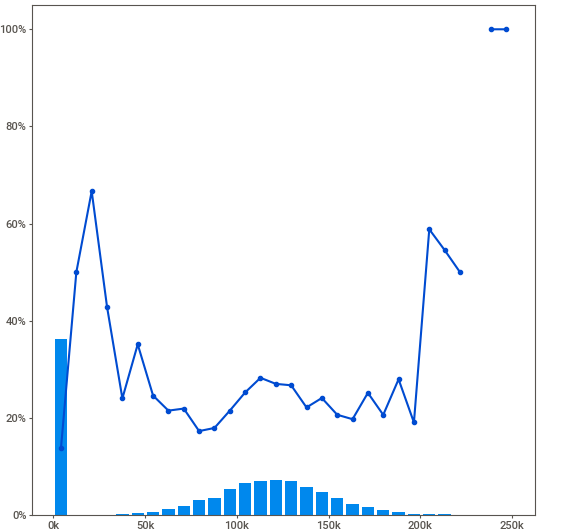
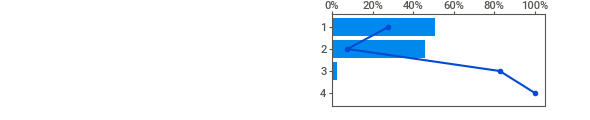
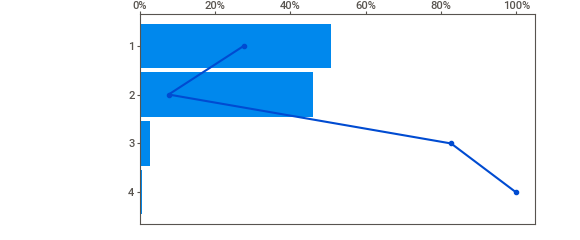
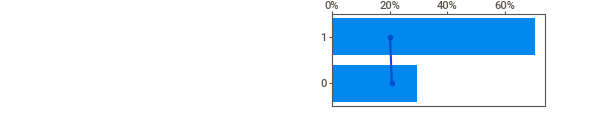
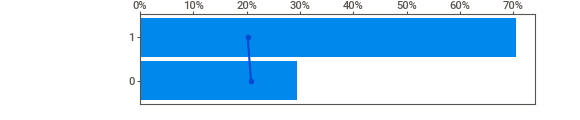
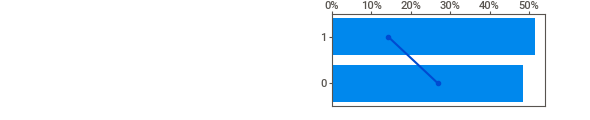
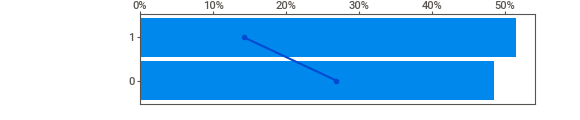
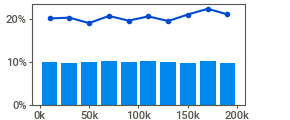
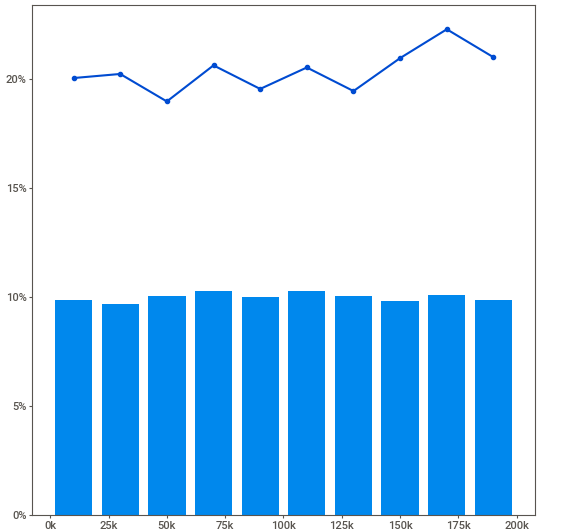
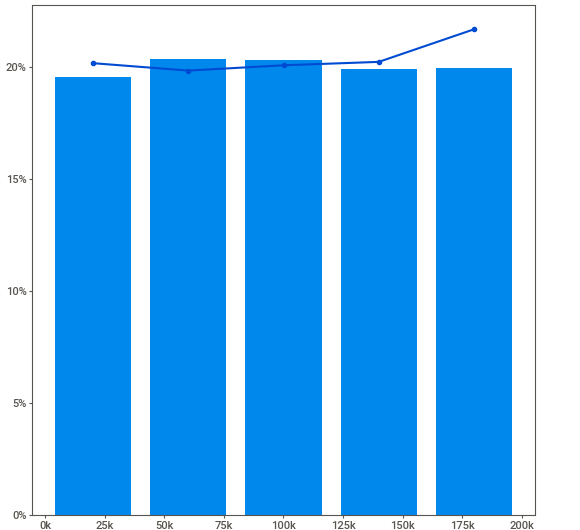
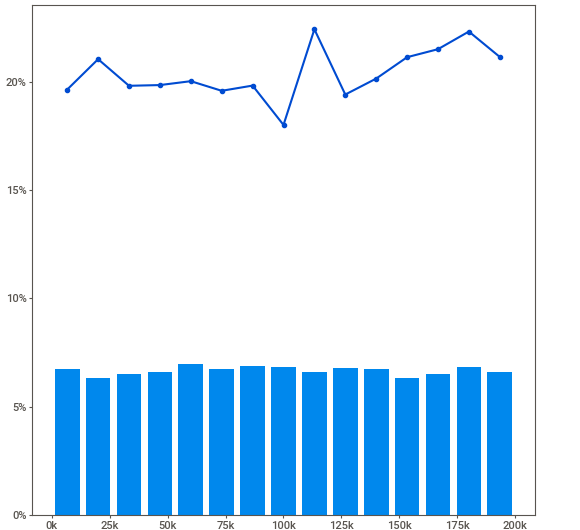
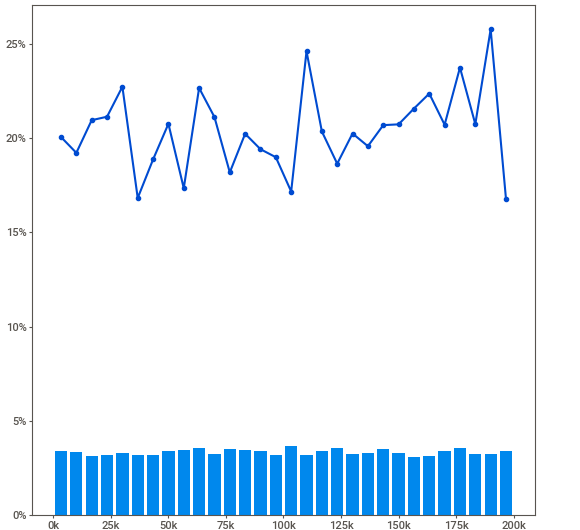
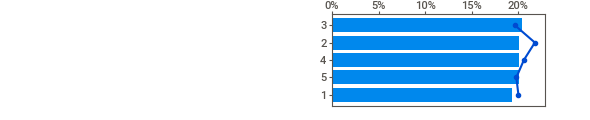
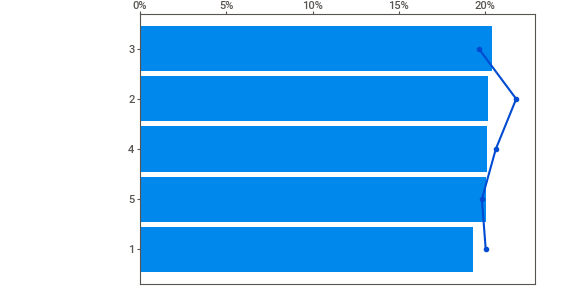
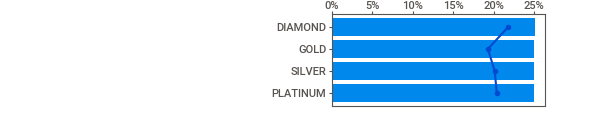
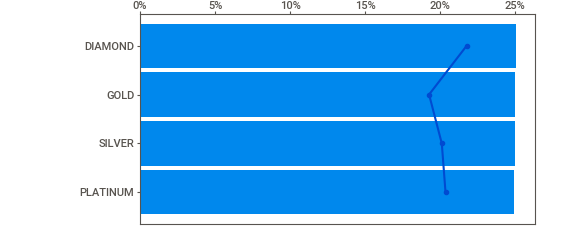
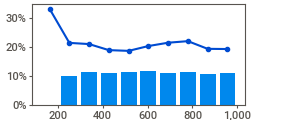
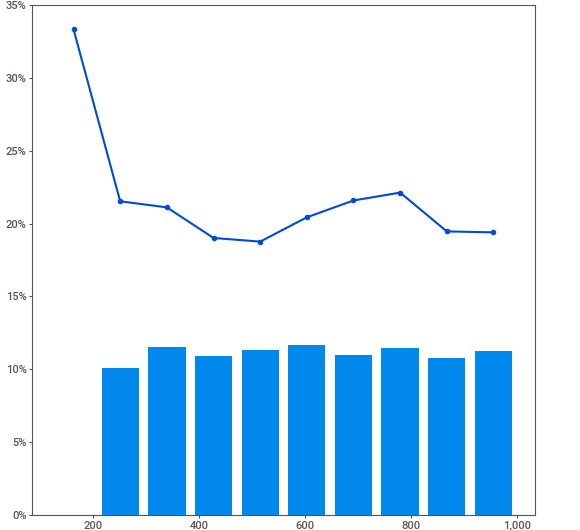
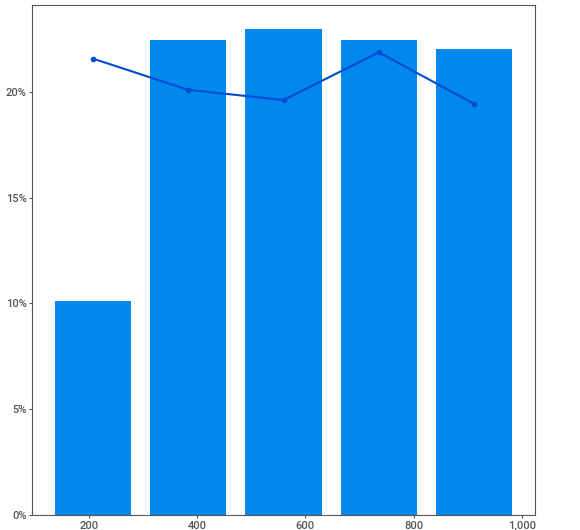
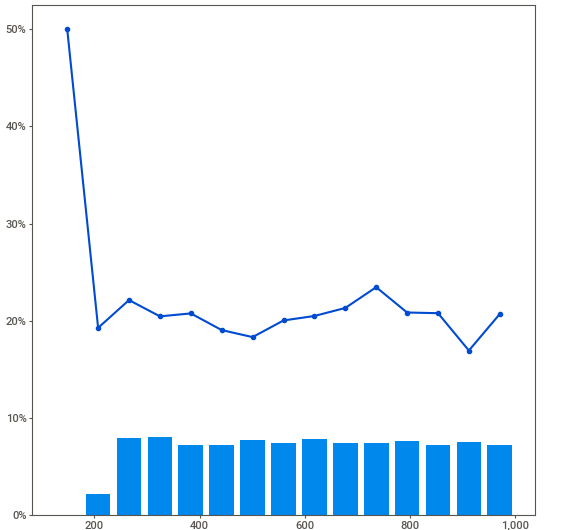
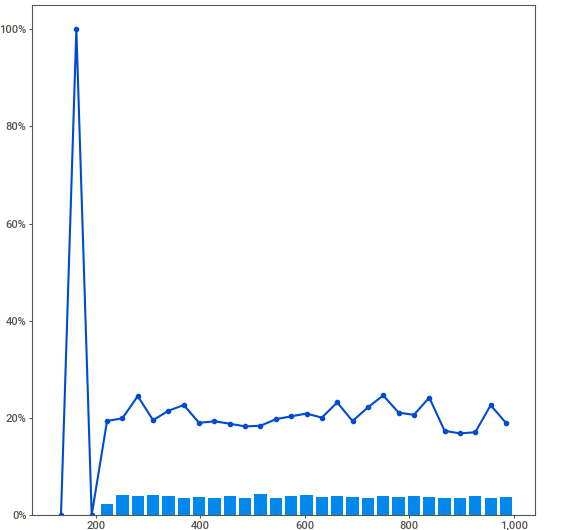
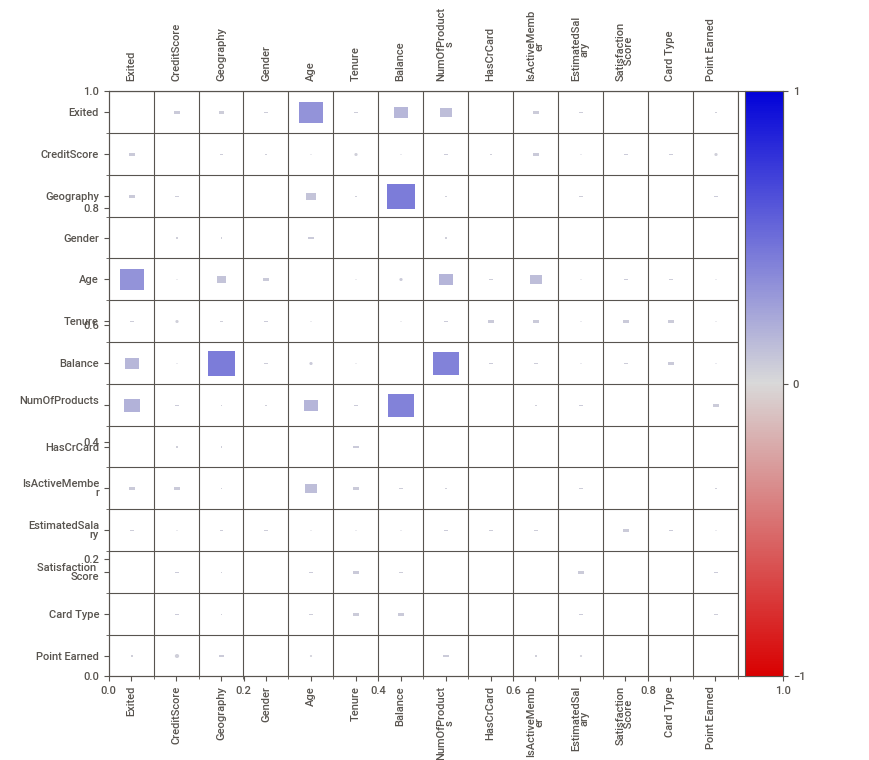
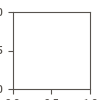

In [9]:
# analyzing the dataset
report = sv.analyze([df, 'Train'], target_feat='Exited')
report.show_notebook(w=None,
                    h=None, 
                    scale=None,
                    layout='widescreen',
                    filepath=None,
                    file_layout=None,
                    file_scale=None)

## 4. Data preparation

### 4.1 Label categorical variables

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
colforle = ['Geography', 'Gender', 'Card Type']
for i in colforle:
    df[i] = le.fit_transform(df[i])
    print(i,' : ',df[i].unique(),' = ',le.inverse_transform(df[i].unique())) 


Geography  :  [0 2 1]  =  ['France' 'Spain' 'Germany']
Gender  :  [0 1]  =  ['Female' 'Male']
Card Type  :  [0 1 3 2]  =  ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


### 4.2 Scaling features

In [9]:
from sklearn.preprocessing import StandardScaler
numCol = ['EstimatedSalary', 'Balance', 'CreditScore', 'Age', 'Point Earned']
scaler = StandardScaler()
for col in numCol:
    df[col] = scaler.fit_transform(df[[col]])
    
df.head()
    

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886,1,2,0,-0.630839
1,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534,0,3,0,-0.666251
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687,1,3,0,-1.015942
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918,0,5,1,-1.135457
4,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276,0,5,1,-0.803472


## 5. Modelling 

### 5.1 Oversampling 

In [10]:
df['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [11]:
from imblearn.over_sampling import SMOTE
from collections import Counter

over = SMOTE(sampling_strategy=1)
f1 = df.drop(columns=['Exited']).iloc[:,:].values
t1 = df.iloc[:, -4].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({1: 7962, 0: 7962})

### 5.2 Splitting data into train and test sets

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.2, random_state=100)

print('Number of x_train: ', x_train.shape)
print('Number of y_train: ', y_train.shape)
print('Number of x_test: ', x_test.shape)
print('Number of y_test: ', y_test.shape)

Number of x_train:  (12739, 13)
Number of y_train:  (12739,)
Number of x_test:  (3185, 13)
Number of y_test:  (3185,)


### 5.3 Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
print(f'Accuracy: {round(accuracy*100,2)}%')
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', cm)

Accuracy: 69.54%
Classification Report:               precision    recall  f1-score   support

           0       0.69      0.70      0.70      1576
           1       0.70      0.69      0.70      1609

    accuracy                           0.70      3185
   macro avg       0.70      0.70      0.70      3185
weighted avg       0.70      0.70      0.70      3185

Confusion Matrix: [[1108  468]
 [ 502 1107]]


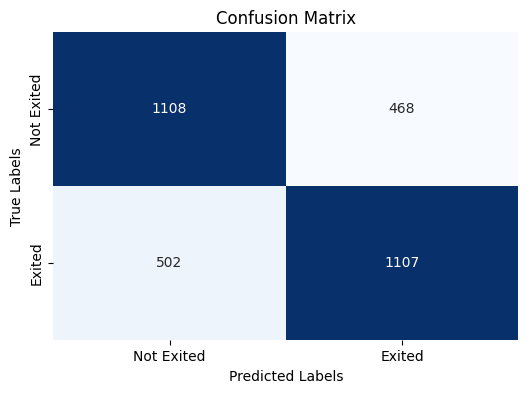

In [14]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Exited', 'Exited'],
            yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### 5.4 Random Forest

**Definition: A Random forest** is a type of an ensemble learning method that uses numerous decision trees to achieve higher prediction accuracy and model stability. This method deals with both regression and classification tasks. Every tree classifies a data instance (or votes for its class) based on attributes, and the forest chooses the classification that received the most votes. In the case of regression tasks, the average of different trees’ decisions is taken.


Imagine a random forest as a group of experts predicting something, like customer churn (leaving a service). Here's how it works for customer churn prediction:

**Many Decision Trees:** Random forest builds a bunch of decision trees, like having many individual experts.

**Training with Twists:** Each tree is trained on a different subset of data and uses a random selection of features (customer attributes) to make predictions. This prevents all trees from making the same mistakes.

**Voting for Churn (Classification):** Each tree predicts if a customer will churn (yes/no). The final prediction for a customer is the most popular vote among all the trees (e.g., if most trees say yes, the customer is predicted to churn).

**Averaging for Risk (Regression):** If predicting a value (e.g., churn probability), the final prediction is the average of what each tree predicts.

![Hình ảnh minh họa Random Forest hoạt động](https://www.altexsoft.com/static/blog-post/2023/11/941e3f85-a1d4-4e48-8c42-8094b733f940.webp)


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred1=rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred1)
cm=confusion_matrix(y_test, y_pred1)
print(f'Accuracy: {round(accuracy*100,2)}%')
print('Classification Report:', classification_report(y_test, y_pred1))
print('Confusion Matrix:', cm)

Accuracy: 91.18%
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1576
           1       0.94      0.88      0.91      1609

    accuracy                           0.91      3185
   macro avg       0.91      0.91      0.91      3185
weighted avg       0.91      0.91      0.91      3185

Confusion Matrix: [[1485   91]
 [ 190 1419]]


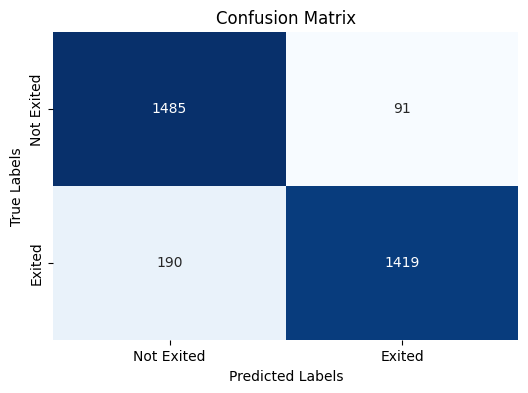

In [16]:
cm = confusion_matrix(y_test, y_pred1)

# Create a heatmap for visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Exited', 'Exited'],
            yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**ROC (Receiver Operating Characteristic)** là đường cong thể hiện khả năng phân biệt giữa các lớp của mô hình.

**AUC (Area Under the ROC Curve)** là diện tích dưới đường cong ROC, là thước đo tổng thể về hiệu suất mô hình.

AUC cao (gần 1) biểu thị mô hình phân loại tốt hơn.

In [17]:
from sklearn.metrics import roc_auc_score

# Tính toán xác suất lớp dương dự đoán bởi mô hình Random Forest
'''rf.predict_proba(x_test): Gọi phương thức predict_proba của mô hình Random Forest đã được huấn luyện (rf).
Phương thức này dự đoán xác suất của mỗi lớp cho mỗi mẫu trong tập kiểm tra (x_test).
[:, 1]: Chọn cột thứ hai của ma trận xác suất dự đoán (y_proba). 
Giả sử bài toán phân loại nhị phân (lớp dương và lớp âm), cột thứ hai đại diện cho xác suất thuộc lớp dương.'''

y_proba = rf.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC-AUC: {roc_auc:.4f}')


ROC-AUC: 0.9686


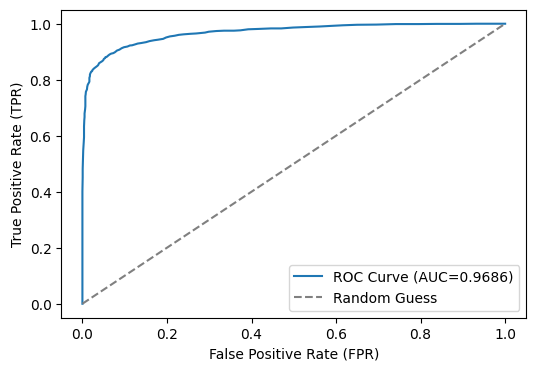

In [18]:
from sklearn.metrics import roc_curve, auc

'''Tính toán các giá trị FPR (False Positive Rate - Tỷ lệ dương tính giả), TPR (True Positive Rate - Tỷ lệ đúng dương tính)
và các ngưỡng phân loại cho các cặp đối nhãn thực tế và xác suất dự đoán.'''
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
'''Tính diện tích dưới đường cong ROC (AUC - Area Under the ROC Curve) dựa trên các giá trị FPR và TPR vừa tính.'''
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, label='ROC Curve (AUC={:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

### 5.5 Features Importance

In [22]:
feature_importances = rf.feature_importances_
feature_names = df.drop(columns=['Exited']).columns

sorted_indices = feature_importances.argsort()
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = [feature_importances[i] for i in sorted_indices]

print("Feature Importance Ranking:")
for i in range(len(sorted_feature_names)):
    print(f"{i+1}. {sorted_feature_names[i]} ({sorted_importances[i]:.4f})")

Feature Importance Ranking:
1. Card Type (0.0317)
2. HasCrCard (0.0329)
3. Satisfaction Score (0.0350)
4. Tenure (0.0453)
5. Geography (0.0558)
6. CreditScore (0.0575)
7. EstimatedSalary (0.0596)
8. Gender (0.0602)
9. Point Earned (0.0617)
10. Balance (0.0774)
11. IsActiveMember (0.1037)
12. NumOfProducts (0.1720)
13. Age (0.2072)


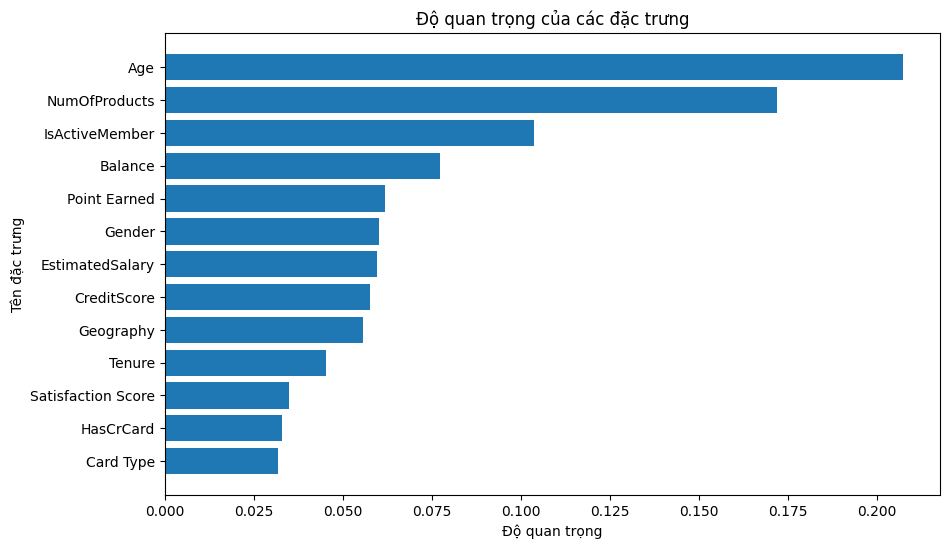

In [23]:
plt.figure(figsize=(10,6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel('Độ quan trọng')
plt.ylabel('Tên đặc trưng')
plt.title('Độ quan trọng của các đặc trưng')
plt.show()